In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('ADD.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [9]:
df.describe(include='all')

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XXXConfid
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2149
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653,NaN
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214,NaN
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN


In [11]:
# Check for missing values
print(df.isnull().sum())

# Check unique values for categorical features
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [12]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object'):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


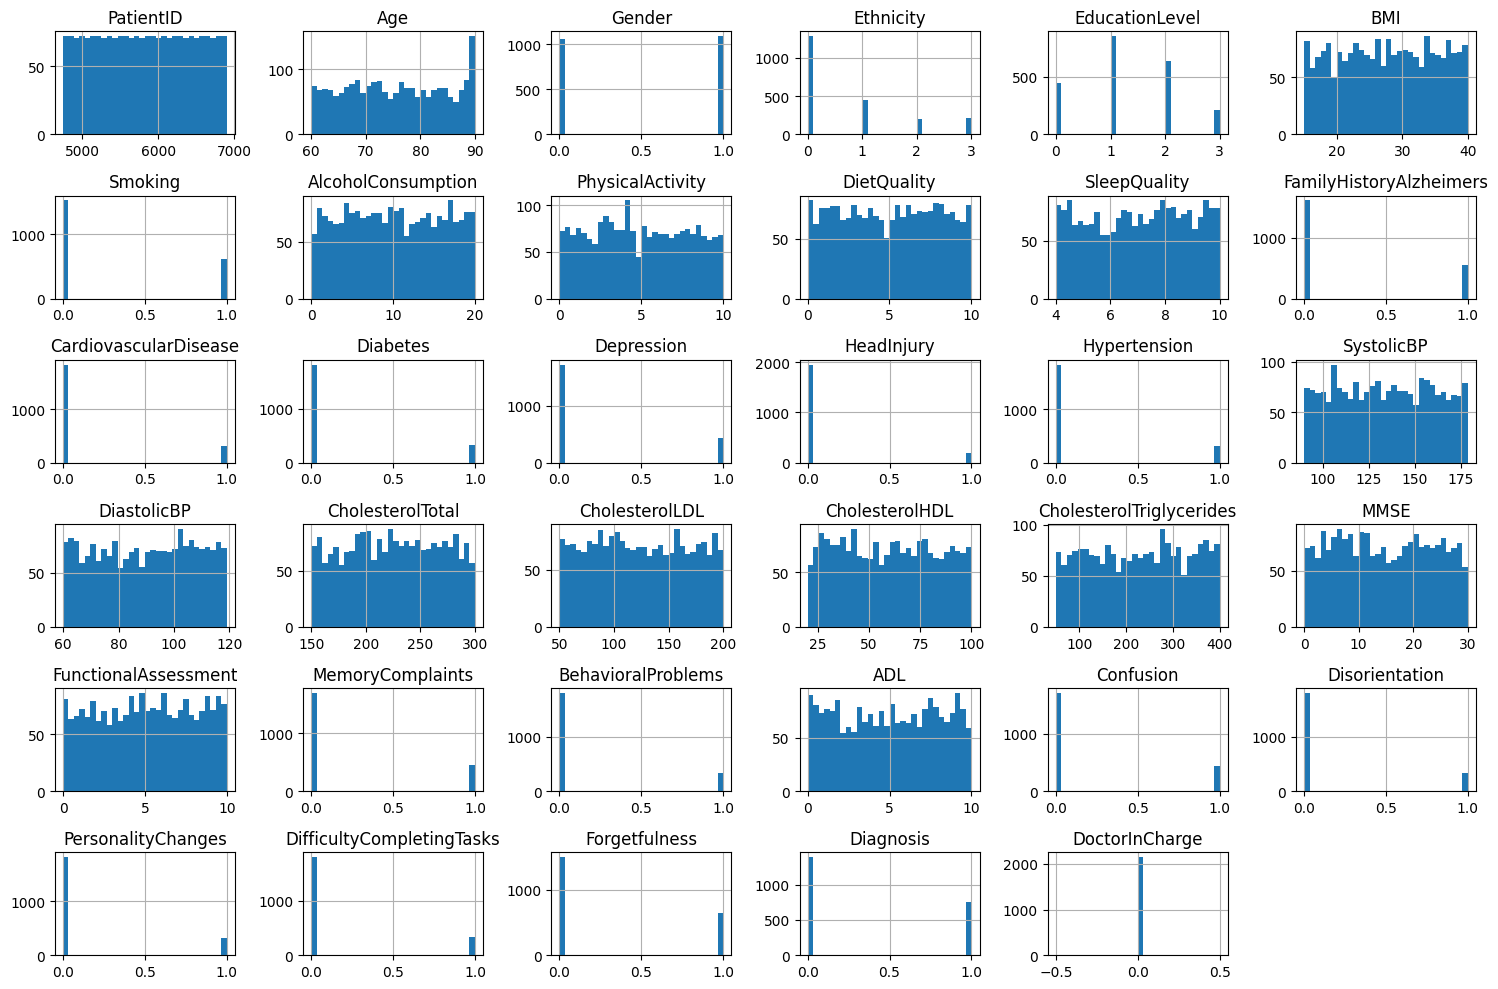

In [13]:
# Distribution of numerical features
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


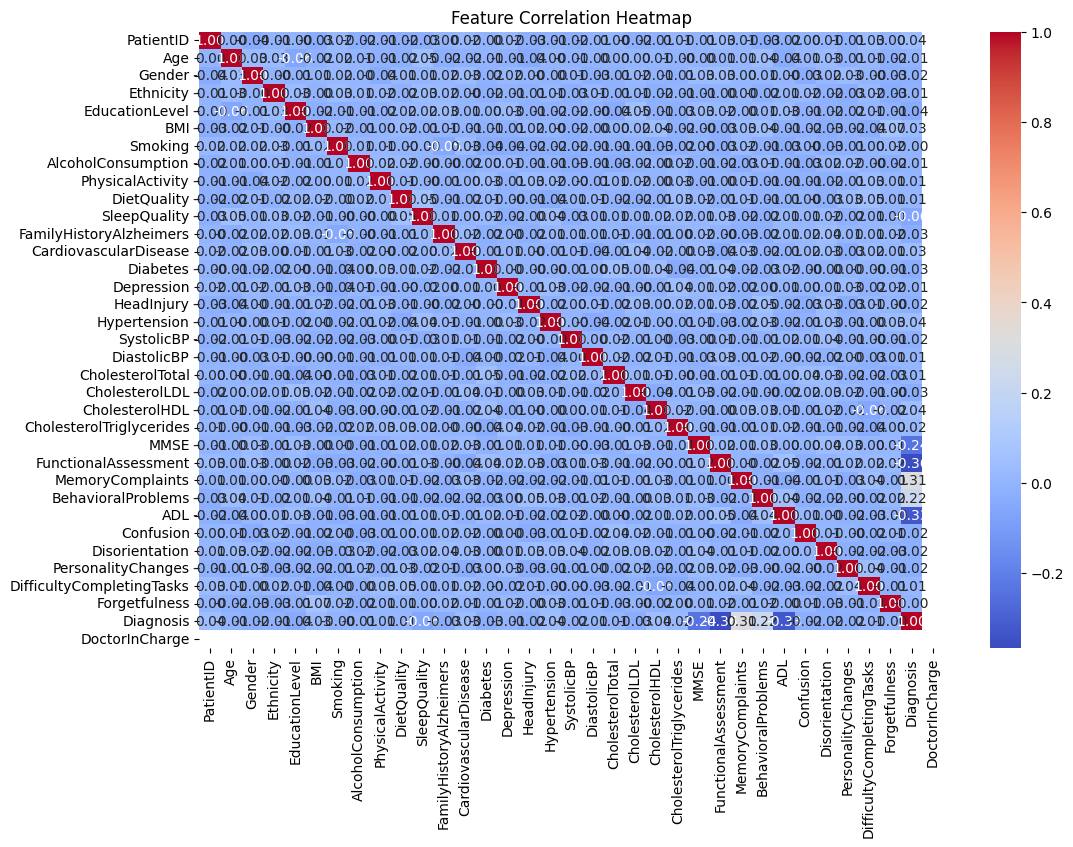

In [14]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


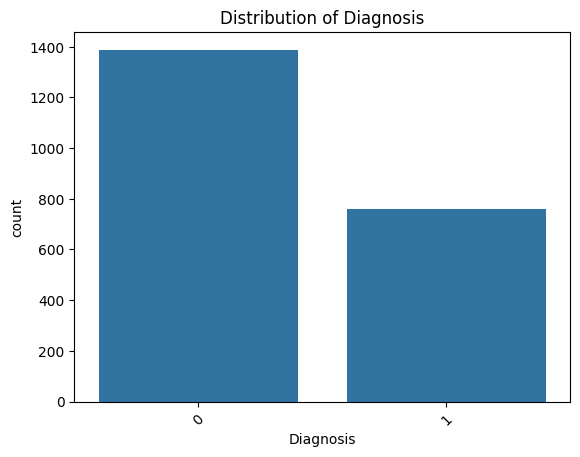

In [17]:
# Countplot of target variable
sns.countplot(x='Diagnosis', data=df)
plt.title("Distribution of Diagnosis")
plt.xticks(rotation=45)
plt.show()


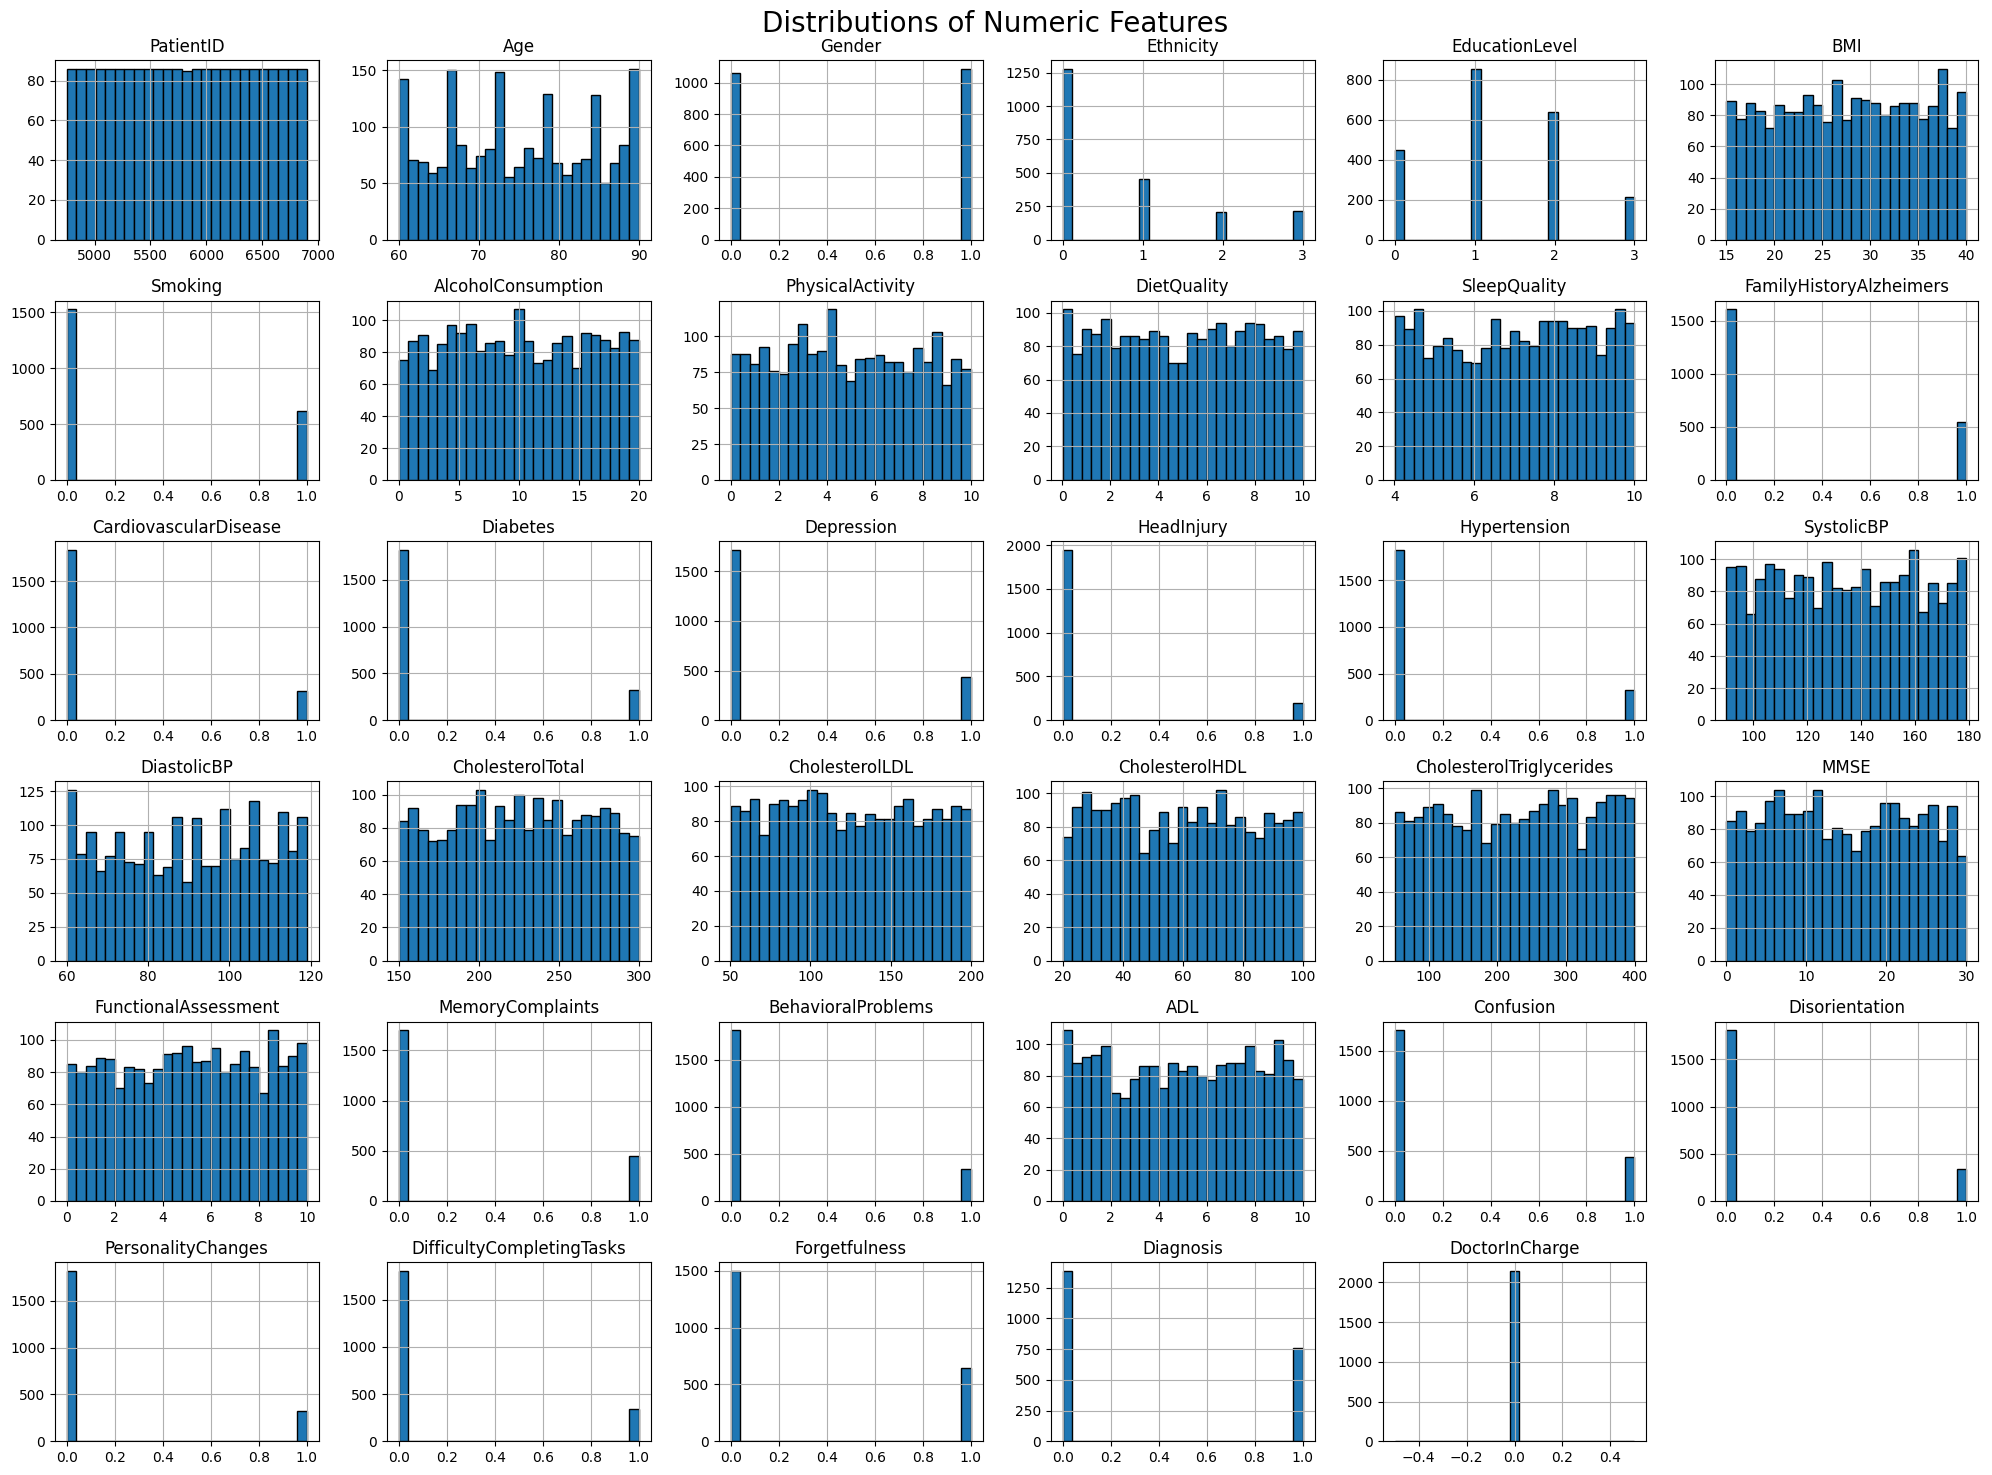

In [21]:
# Histograms for numerical features
df.hist(bins=25, figsize=(20, 15), edgecolor='black')
plt.suptitle("Distributions of Numeric Features", fontsize=20)
plt.tight_layout()
plt.show()

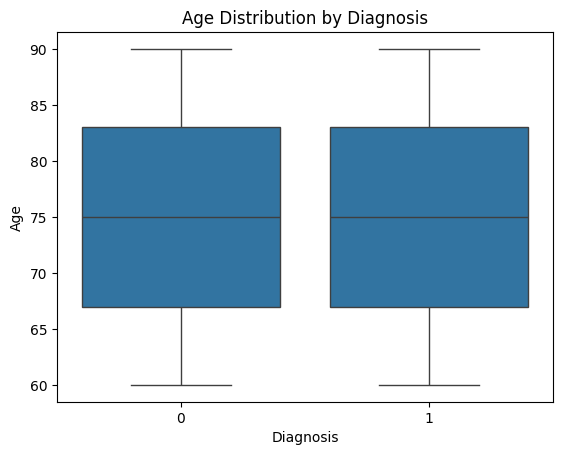

In [22]:
# Boxplot of Age by Diagnosis
sns.boxplot(x='Diagnosis', y='Age', data=df)
plt.title("Age Distribution by Diagnosis")
plt.show()

In [23]:
# Grouped statistics (mean values per Diagnosis group)
grouped = df.groupby('Diagnosis').mean()
print("Group-wise feature means:\n", grouped)

Group-wise feature means:
              PatientID        Age    Gender  Ethnicity  EducationLevel  \
Diagnosis                                                                
0          5806.177106  74.945284  0.514039   0.708423        1.316055   
1          5859.401316  74.842105  0.492105   0.677632        1.232895   

                 BMI   Smoking  AlcoholConsumption  PhysicalActivity  \
Diagnosis                                                              
0          27.515092  0.290137           10.071880           4.90764   
1          27.912670  0.285526            9.980156           4.94316   

           DietQuality  ...  FunctionalAssessment  MemoryComplaints  \
Diagnosis               ...                                           
0             4.974839  ...              5.860669          0.115911   
1             5.026581  ...              3.653380          0.376316   

           BehavioralProblems       ADL  Confusion  Disorientation  \
Diagnosis                       

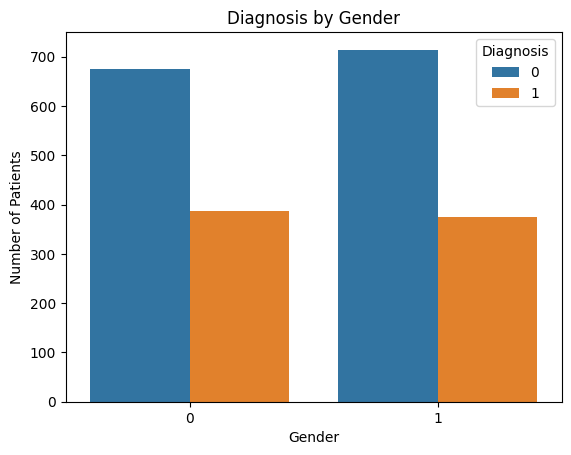

In [25]:
sns.countplot(x='Gender', hue='Diagnosis', data=df)
plt.title("Diagnosis by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.legend(title="Diagnosis")
plt.show()


In [4]:
# Prepare for modeling: drop non-informative columns and separate target
df_clean = df.drop(columns=['PatientID', 'DoctorInCharge'])

# Separate features and target
X = df_clean.drop(columns=['Diagnosis'])  # Features
y = df_clean['Diagnosis']                # Target
